# Setup Nature Modules

## Introduction

<!-- 在这个教程里，我们将创建一个空间框，所有输入的数据都会被自动的重新调整到这个空间范围 -->

Loading an example dataset whose shape is (3 * 4).

<!-- import netCDF4 as nc
import numpy as np
import rasterio
from rasterio.transform import from_origin

# 创建并保存 netCDF 数据
def create_netCDF(filename='example.nc'):
    # 创建一个新的 netCDF 文件
    dataset = nc.Dataset(filename, 'w', format='NETCDF4')

    # 创建维度
    dataset.createDimension('x', 3)
    dataset.createDimension('y', 4)
    dataset.createDimension('time', 5)

    # 创建变量
    times = dataset.createVariable('time', np.int32, ('time',))
    xs = dataset.createVariable('x', np.int32, ('x',))
    ys = dataset.createVariable('y', np.int32, ('y',))
    values = dataset.createVariable('value', np.float32, ('x', 'y', 'time'))

    # 填充数据
    times[:] = range(2015, 2020)  # 填充时间 2015 到 2019
    xs[:] = range(3)  # x 坐标
    ys[:] = range(4)  # y 坐标
    values[:, :, :] = np.random.rand(3, 4, 5)  # 随机数据

    # 关闭文件
    dataset.close()
    return filename

# 创建并保存 TIFF 文件
def create_tiff(base_filename, values):
    tiff_files = []
    # 生成每个时间点的 TIFF 文件
    for i in range(values.shape[2]):
        data = values[:, :, i]
        tiff_filename = f'{base_filename}_time_{i+1}.tif'
        with rasterio.open(
            tiff_filename, 'w', driver='GTiff',
            height=data.shape[0], width=data.shape[1],
            count=1, dtype=str(data.dtype),
            crs='+proj=latlong', transform=from_origin(0, 0, 1, 1)
        ) as dst:
            dst.write(data, 1)
        tiff_files.append(tiff_filename)
    return tiff_files

# 生成 netCDF 文件
nc_file = create_netCDF()

# 读取 netCDF 数据
dataset = nc.Dataset(nc_file, 'r')
values = dataset.variables['value'][:]

# 生成 TIFF 文件
tiff_files = create_tiff('example', values)

# 关闭 netCDF 文件
dataset.close()

nc_file, tiff_files -->


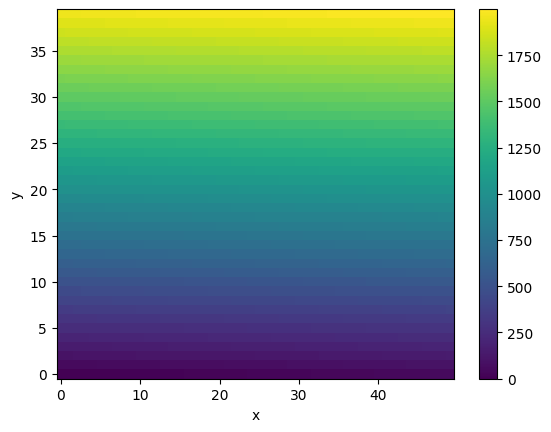

In [1]:
import xarray as xr
import numpy as np


data = xr.DataArray(data=np.arange(2000).reshape((40, 50)), dims=("y", "x"))
data.plot()

In [2]:
data

<xarray.DataArray (y: 40, x: 50)>
array([[   0,    1,    2, ...,   47,   48,   49],
       [  50,   51,   52, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  147,  148,  149],
       ...,
       [1850, 1851, 1852, ..., 1897, 1898, 1899],
       [1900, 1901, 1902, ..., 1947, 1948, 1949],
       [1950, 1951, 1952, ..., 1997, 1998, 1999]])
Dimensions without coordinates: y, x

Create an `ABSESpy` model with 2 * 2 natural patch module.

In [3]:
from abses import MainModel

model = MainModel()
module = model.nature.create_module("from_resolution", shape=(10, 10))

model.summary()

Using ABSESpy version: v0.5.7


name     MainModel
state         init
tick             0
dtype: object

When apply raster of a `xarray.DataArray` to natural module, the raster will be automatically reprojected to the natural module's spatial extent.

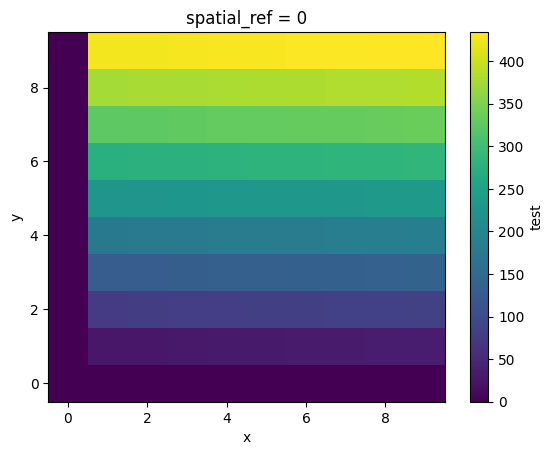

In [4]:
module.apply_raster(
    data, attr_name="test", cover_crs=True, resampling_method="bilinear"
)
module.get_xarray("test").plot()

note: edge effect may exists when re-projecting the raster.

## Working with real data